In [2]:
import sklearn
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

import matplotlib.pyplot as plt 
import seaborn as sns

In [9]:
heart = pd.read_csv('./Data/framingham.csv')

In [20]:
heart.dropna(inplace = True)
len(heart)

3656

In [32]:
train = heart.iloc[0:-300, :]
valid = heart.iloc[-300:, :]

In [35]:
train.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [36]:
Label = train['TenYearCHD']

In [45]:
InputFeature = train.loc[:, ~train.columns.isin(['TenYearCHD'])]
InputFeature = sm.add_constant(InputFeature)

In [48]:
model = sm.Logit(Label, InputFeature)
model = model.fit()
print(model.params)

Optimization terminated successfully.
         Current function value: 0.375515
         Iterations 7
const             -8.336952
male               0.551133
age                0.058795
education         -0.045988
currentSmoker      0.057819
cigsPerDay         0.017807
BPMeds             0.135129
prevalentStroke    0.732066
prevalentHyp       0.291132
diabetes           0.053302
totChol            0.002211
sysBP              0.016669
diaBP             -0.007260
BMI                0.016281
heartRate         -0.003441
glucose            0.008615
dtype: float64


In [49]:
print( model.summary() )

                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 3356
Model:                          Logit   Df Residuals:                     3340
Method:                           MLE   Df Model:                           15
Date:                Fri, 05 Aug 2022   Pseudo R-squ.:                  0.1187
Time:                        17:28:57   Log-Likelihood:                -1260.2
converged:                       True   LL-Null:                       -1430.0
Covariance Type:            nonrobust   LLR p-value:                 3.192e-63
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.3370      0.748    -11.147      0.000      -9.803      -6.871
male                0.5511      0.114      4.827      0.000       0.327       0.775
age                 0.0588      

In [50]:
np.exp(model.params).round(4)

const              0.0002
male               1.7352
age                1.0606
education          0.9551
currentSmoker      1.0595
cigsPerDay         1.0180
BPMeds             1.1447
prevalentStroke    2.0794
prevalentHyp       1.3379
diabetes           1.0547
totChol            1.0022
sysBP              1.0168
diaBP              0.9928
BMI                1.0164
heartRate          0.9966
glucose            1.0087
dtype: float64

### Valid

In [57]:
Label_v = valid['TenYearCHD']
InputFeature_v = valid.loc[:, ~valid.columns.isin(['TenYearCHD'])]
InputFeature_v = sm.add_constant(InputFeature_v)

In [58]:
Predicted = model.predict(InputFeature_v)
Predicted.head()

3899    0.124200
3900    0.048408
3902    0.321745
3904    0.190446
3905    0.092353
dtype: float64

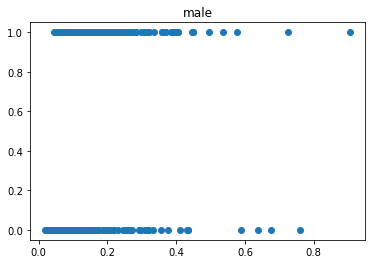

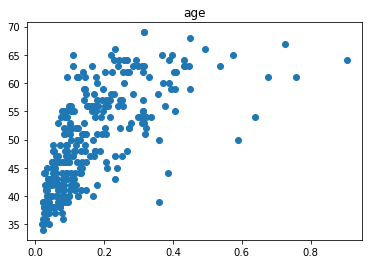

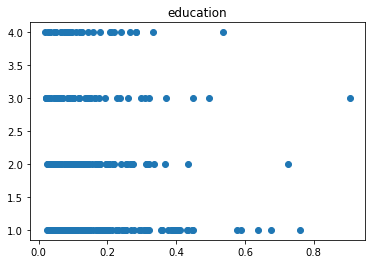

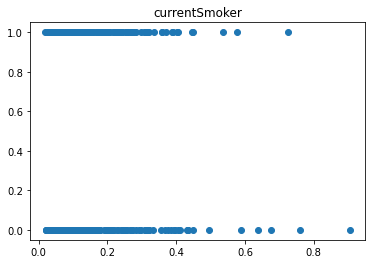

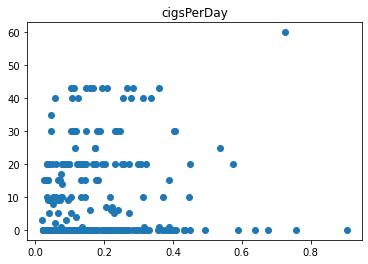

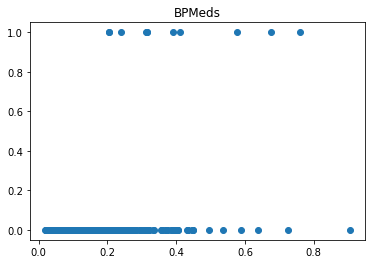

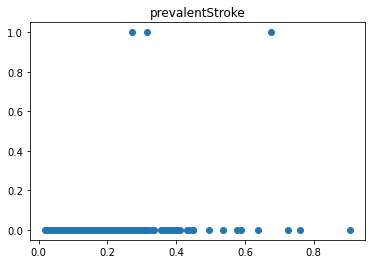

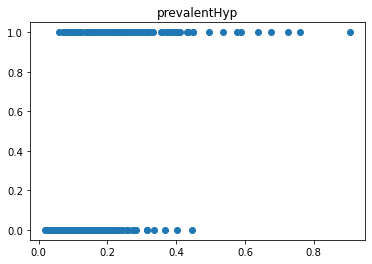

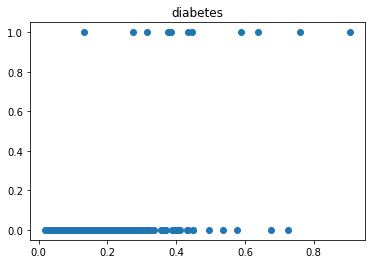

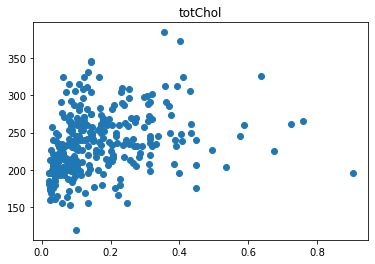

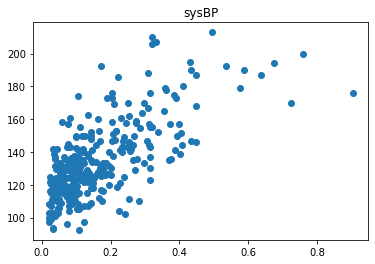

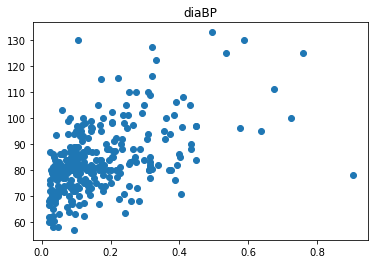

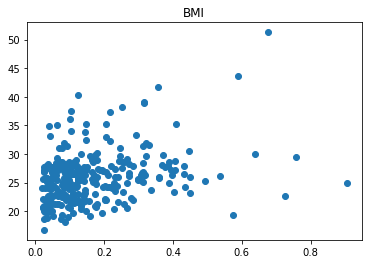

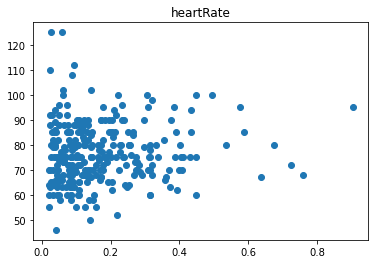

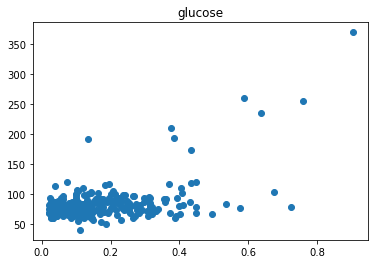

In [59]:
for column in InputFeature_v.columns[1:]:
    plt.plot(model.predict(InputFeature_v), valid[column], 'o')
    plt.title(column)
    plt.show()

### Validation set에서 성능 검증

In [61]:
fpr, tpr, thresholds = sklearn.metrics.roc_curve(Label_v,  Predicted)

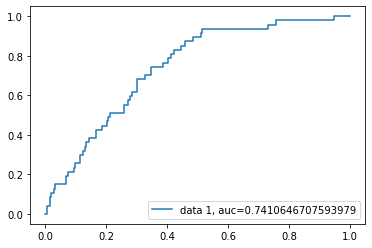

In [62]:
auc = sklearn.metrics.roc_auc_score(Label_v, Predicted)
auc
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [63]:
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]

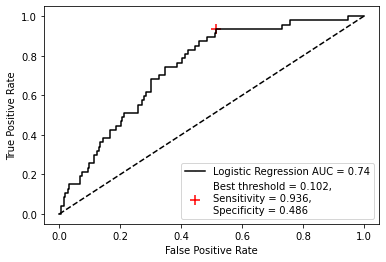

In [64]:
#plot roc and best threshold
sens, spec = tpr[ix], 1-fpr[ix]
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', markersize=0.01, color='black')
plt.plot(fpr, tpr, marker='.', color='black', markersize=0.05, label="Logistic Regression AUC = %.2f" % 
         sklearn.metrics.roc_auc_score(Label_v, Predicted))
plt.scatter(fpr[ix], tpr[ix], marker='+', s=100, color='r', 
            label='Best threshold = %.3f, \nSensitivity = %.3f, \nSpecificity = %.3f' % (best_thresh, sens, spec))

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)

# show the plot
plt.show()